### **Intro**

We are interested in the convergence rate of the Conjugate Gradient Method and it's relationship to eigenvalues distributions. This notebook is a trying to replicate the experiment presented in Professor's Greenbaum's work in chapter 3 of the book. 

We consider a $n\times n$ SPD matrix with eigenvalues paramaterized by: 

$$
\lambda_i = \lambda_1 + \frac{i - 1}{n - 1} \rho^{n - i}, i = 2, \cdots, n - 1
$$

Where $\rho$ is taken to be a number between $0, 1$. 

┌ Warning: Assignment to `ResNorm` in soft scope is ambiguous because a global variable by the same name exists: `ResNorm` will be treated as a new local. Disambiguate by using `local ResNorm` to suppress this warning or `global ResNorm` to assign to the existing global variable.
└ @ nothing /Users/hongdali/Desktop/repos/Silly_Julia_stuff/Subspace_Projection_Method/CG_Convergence_ScratchPaper.jl:92


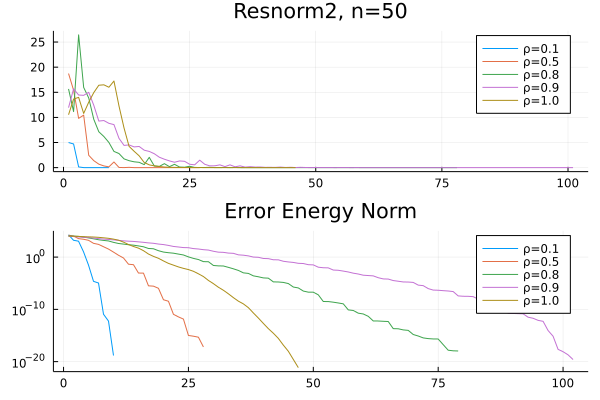

In [48]:
include("CG_Convergence_ScratchPaper.jl")

Visualize the Distribution of the Eigenvalues on the realline. 

The expression generate a sequence of increasing eigenvalues. The sequence is oncreasing like the function $i\rho^i$, uniform when $\rho = 1$. 

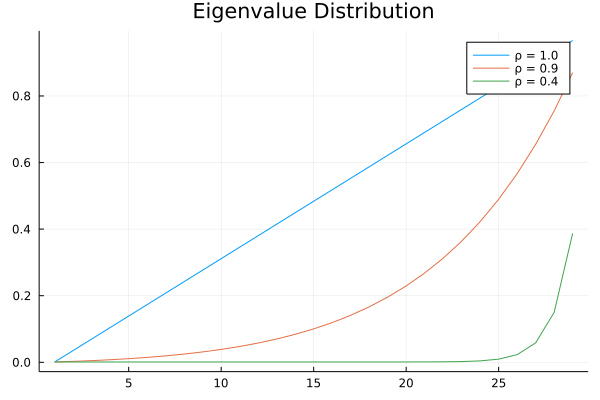

In [37]:
n = 30
λ1 = 0.001
fig = plot(title="Eigenvalue Distribution")
Eigenvalues = nothing
for ρ = [1, 0.9, 0.4]
    EigenValues = Vector{Float64}()
    for i in 1: n - 1 
        push!(EigenValues, λ1 + ((i - 1)/(n - 1))*ρ^(n - i))
    end
    plot!(fig, EigenValues, label="ρ = $(ρ)")
    
end
display(fig)



Let's try out for different values of $\rho$ under Float64 Arithematic, using the Lanczos based Conjugate Gradient. 

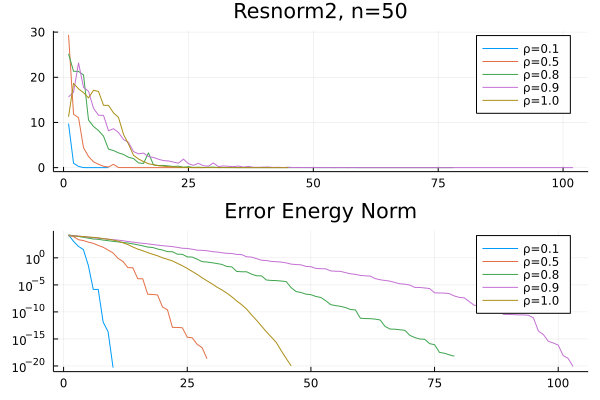

In [49]:
# ----------------------------------------------------------------------------------------------------------------------
# Interactive Section here. 
n = 50
fig1 = plot(title="Resnorm2, n=$(n)")
fig2 = plot(title="Error Energy Norm")

for ρ = [0.1, 0.5, 0.8, 0.9, 1]
    A = GetNastyPSDMatrix(ρ, n)  # A random matrix
    b = rand(size(A, 2))
    cg, Guesses, ResNorm = RunCGTillEnd(A, b, maxitr=2000, epsilon=1e-10)
    plot!(fig1, ResNorm, label="ρ=$(ρ)")
    plot!(fig2, EnergyErrorNorm(A, b, Guesses), yaxis=:log10, label="ρ=$(ρ)")
    
end
plot(fig1, fig2, layout=(2, 1))

Now Let's try it out for Exact Arithemtic Computations. 



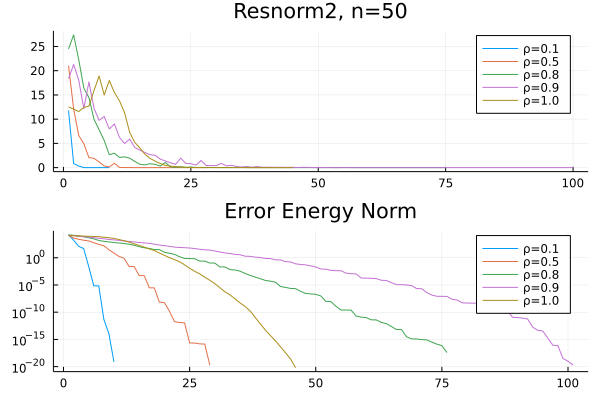

In [52]:
n = 50
fig1 = plot(title="Resnorm2, n=$(n)")
fig2 = plot(title="Error Energy Norm")

for ρ = [0.1, 0.5, 0.8, 0.9, 1]
    A = GetNastyPSDMatrix(ρ, n)  # A random matrix
    b = rand(size(A, 2))
    A = convert(Matrix{Rational{BigInt}}, A)
    b = convert(Vector{Rational{BigInt}}, b)
    cg, Guesses, ResNorm = RunCGTillEnd(A, b, maxitr=2000, epsilon=1e-10)
    plot!(fig1, ResNorm, label="ρ=$(ρ)")
    plot!(fig2, EnergyErrorNorm(A, b, Guesses), yaxis=:log10, label="ρ=$(ρ)")
    
end
plot(fig1, fig2, layout=(2, 1))